In [1]:
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import DataLoader

In [17]:
#based on https://towardsdatascience.com/build-a-simple-neural-network-using-pytorch-38c55158028d
n_input, n_hidden, n_hidden2, n_out, batch_size, learning_rate = 9, 15, 10, 2, 10, 0.001

In [18]:
train_pd = pd.read_csv('104k.csv')
train_tensor = torch.tensor(train_pd.to_numpy()).float()

In [19]:
train_normalized = torch.nn.functional.normalize(train_tensor, dim=0)
print(train_normalized.shape)

print(train_tensor[0:10], train_normalized[0:10])

torch.Size([104765, 11])
tensor([[4.0000e+00, 4.0000e+00, 1.0000e+00, 3.0000e+00, 4.0895e+00, 3.8699e+01,
         1.4250e+09, 3.3358e+07, 1.7946e+02, 1.7736e+01, 3.0658e+02],
        [1.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00, 1.6284e+01, 1.6947e+01,
         2.9368e+09, 7.4176e+07, 1.9727e+02, 1.1377e+01, 3.3131e+02],
        [4.0000e+00, 1.0000e+00, 3.0000e+00, 5.0000e+00, 1.9161e+01, 1.7569e+01,
         3.1188e+09, 7.3704e+07, 2.9078e+01, 2.0457e+02, 3.1011e+00],
        [3.0000e+00, 7.0000e+00, 1.0000e+00, 7.0000e+00, 4.2667e+00, 2.8046e+01,
         2.1094e+09, 6.1545e+07, 2.7522e+00, 2.0457e+02, 3.0594e+00],
        [2.0000e+00, 6.0000e+00, 6.0000e+00, 2.0000e+00, 3.8249e+00, 3.7824e+01,
         2.2687e+09, 7.1417e+07, 2.5378e+01, 2.0457e+02, 3.1078e+00],
        [3.0000e+00, 1.0000e+00, 5.0000e+00, 5.0000e+00, 1.6732e+01, 1.4809e+01,
         2.3456e+09, 6.3324e+07, 8.1557e+01, 1.3766e+02, 6.8962e+01],
        [4.0000e+00, 2.0000e+00, 4.0000e+00, 4.0000e+00, 4.5424e+01, 

In [20]:
train, validate, test = torch.utils.data.random_split(train_normalized, [80000, 10000, 14765])
train_loader = DataLoader(train, batch_size=batch_size)

In [21]:
# train_x = train_tensor[:28000, :9].float()
# train_y = train_tensor[:28000, 9:10].float()

# train_x = torch.randn(batch_size, n_input)
# train_y = (torch.rand(size=(batch_size, 1)) < 0.5).float()
#
# print(train_x.shape, train_y.shape)

In [22]:
model = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_hidden2),
                      nn.ReLU(),
                      nn.Linear(n_hidden2, n_out),
                      nn.Sigmoid())
print(model)

Sequential(
  (0): Linear(in_features=9, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=2, bias=True)
  (5): Sigmoid()
)


In [39]:
loss_function = nn.HuberLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.99)

In [40]:
losses = []
for i in range(10):
    for j, item in enumerate(train_loader):
        train_x, train_y = item[:, :9], item[:, 9:]
        pred_y = model(train_x)
        loss = loss_function(pred_y, train_y)
        losses.append(loss.item())

        model.zero_grad()
        loss.backward()

        optimizer.step()

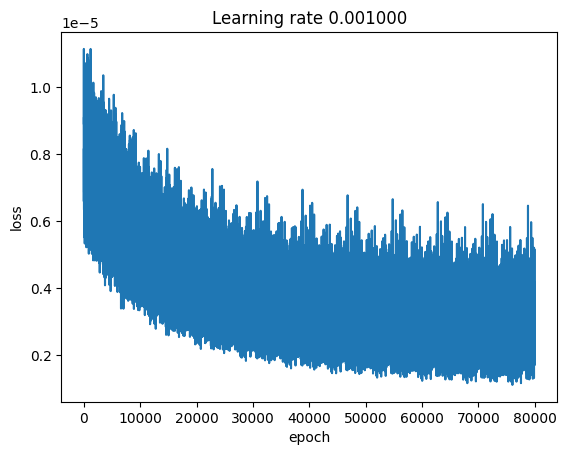

In [41]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

In [42]:
#                                      bandwidth ↓
model(torch.tensor([1., 1., 1., 1., 1., 1., 1., 100., 1.]))

tensor([1.2432e-33, 4.0030e-34], grad_fn=<SigmoidBackward0>)

In [43]:
#                                      bandwidth ↓
model(torch.tensor([1., 1., 1., 1., 1., 1., 1., 1000., 1.]))

tensor([0., 0.], grad_fn=<SigmoidBackward0>)

In [44]:
model(train_normalized[10000:10050, :9])

tensor([[0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0030, 0.0028],
        [0.0

In [45]:
train_normalized[10000:10050, 9:]

tensor([[2.7835e-03, 3.0122e-03],
        [3.6944e-03, 1.4306e-03],
        [0.0000e+00, 0.0000e+00],
        [3.1405e-03, 2.0596e-03],
        [4.3256e-03, 1.1495e-04],
        [3.3805e-03, 2.1261e-03],
        [0.0000e+00, 0.0000e+00],
        [4.2216e-03, 1.3012e-03],
        [4.3256e-03, 7.9119e-05],
        [4.3256e-03, 7.1523e-05],
        [7.2340e-04, 3.9398e-03],
        [4.3256e-03, 1.0061e-04],
        [4.3256e-03, 6.9412e-05],
        [2.2131e-03, 4.2890e-03],
        [3.4286e-03, 1.4887e-03],
        [4.3256e-03, 8.3677e-05],
        [0.0000e+00, 0.0000e+00],
        [4.2894e-04, 4.2203e-03],
        [4.3256e-03, 1.1138e-04],
        [0.0000e+00, 0.0000e+00],
        [3.6863e-03, 1.8979e-04],
        [4.3039e-03, 1.4825e-04],
        [2.0433e-04, 5.4954e-03],
        [8.1354e-04, 5.3626e-03],
        [1.8543e-03, 3.8208e-03],
        [4.3256e-03, 7.8629e-05],
        [2.3968e-04, 6.2159e-03],
        [0.0000e+00, 0.0000e+00],
        [4.3256e-03, 8.3519e-05],
        [4.325

In [46]:
train_tensor[10000:10050, 9:]


tensor([[131.6388, 140.3515],
        [174.7189,  66.6575],
        [  0.0000,   0.0000],
        [148.5254,  95.9641],
        [204.5720,   5.3558],
        [159.8746,  99.0622],
        [  0.0000,   0.0000],
        [199.6513,  60.6270],
        [204.5720,   3.6864],
        [204.5720,   3.3325],
        [ 34.2118, 183.5691],
        [204.5720,   4.6876],
        [204.5720,   3.2342],
        [104.6641, 199.8391],
        [162.1499,  69.3630],
        [204.5720,   3.8988],
        [  0.0000,   0.0000],
        [ 20.2859, 196.6405],
        [204.5720,   5.1895],
        [  0.0000,   0.0000],
        [174.3351,   8.8430],
        [203.5440,   6.9075],
        [  9.6632, 256.0486],
        [ 38.4746, 249.8628],
        [ 87.6953, 178.0235],
        [204.5720,   3.6636],
        [ 11.3354, 289.6215],
        [  0.0000,   0.0000],
        [204.5720,   3.8915],
        [204.5720,   3.0608],
        [129.7199, 116.7115],
        [174.4173,  24.6028],
        [  7.1686, 329.5350],
        [2